In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

## Carga y Exploración de Base de Datos

In [ ]:
#Enlace que trae el archivo desde github
url = "https://raw.githubusercontent.com/elianasv/Proyecto-IA/main/H1N1_Flu_Vaccines.csv"

# Cargar el archivo csv
df = pd.read_csv(url)
df = df.dropna()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,bhuqouqj,Non-MSA,2.0,0.0,pxcmvdjn,xqwwgdyp,1,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Employed,lzgpxyit,"MSA, Not Principle City",2.0,0.0,xicduogh,qxajmpny,1,1
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Own,Employed,oxchjgsf,Non-MSA,1.0,2.0,xicduogh,ccgxvspp,1,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,lzgpxyit,"MSA, Not Principle City",1.0,3.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,lrircsnp,"MSA, Not Principle City",1.0,0.0,arjwrbjb,bxpfxfdn,0,0
26683,26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,Own,Employed,fpwskwrf,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,1,1
26690,26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,Own,Employed,mlyzmhmf,"MSA, Principle City",2.0,1.0,mcubkhph,oijqvulv,0,0
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,pxcmvdjn,xgwztkwe,0,0


## Definición de Funciones

In [ ]:
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3.5))
    ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar = False)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=9)
    ax.set_yticklabels(ax.get_xmajorticklabels(), fontsize=9)
    plt.xlabel('Predicciones', fontweight='bold')
    plt.ylabel('Valores reales', fontweight='bold')
    plt.title(title, fontweight='bold')
    plt.show()

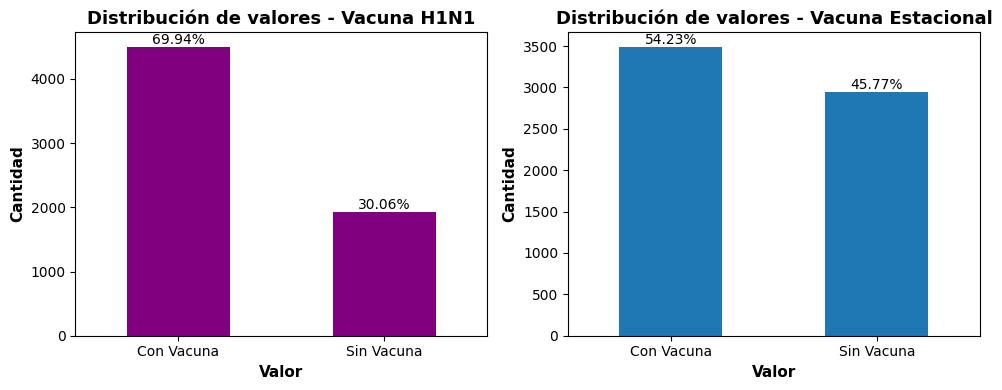

In [ ]:
label_seasonal = df['seasonal_vaccine']
label_h1n1 = df['h1n1_vaccine']

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_title('Distribución de valores - Vacuna H1N1', fontsize=13, fontweight='bold')
value_counts_h1n1 = label_h1n1.value_counts()
label_h1n1.value_counts().plot(kind='bar', ax=axs[0], color = 'purple')
axs[0].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[0].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_h1n1 = ['Con Vacuna', 'Sin Vacuna']
valores_h1n1 = [0, 1]
axs[0].set_xticks(valores_h1n1)
axs[0].set_xticklabels(etiquetas_h1n1, rotation=0)

for i, v in enumerate(value_counts_h1n1):
    axs[0].text(i, v, f"{(v / len(label_h1n1) * 100):.2f}%", ha='center', va='bottom')

axs[1].set_title('Distribución de valores - Vacuna Estacional', fontsize=13, fontweight='bold')
value_counts_seasonal = label_seasonal.value_counts()
label_seasonal.value_counts().plot(kind='bar', ax=axs[1])
axs[1].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[1].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_seasonal = ['Con Vacuna', 'Sin Vacuna']
valores_seasonal = [0, 1]
axs[1].set_xticks(valores_seasonal)
axs[1].set_xticklabels(etiquetas_seasonal, rotation=0)

for i, v in enumerate(value_counts_seasonal):
    axs[1].text(i, v, f"{(v / len(label_seasonal) * 100):.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Distribución de Datos - H1N1

In [ ]:
datos = df.copy()

datos = datos.iloc[:, :-2]
datos = datos.drop(datos.columns[0], axis=1)
datos = datos.dropna()
datos = datos.astype('category')

data = pd.get_dummies(datos)

data = data.iloc[:, :-2]

X_tr, X_te, y_tr, y_te = train_test_split(data, label_h1n1, test_size=0.2, random_state=42)

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train, y_train = smote.fit_resample(X_tr, y_tr)
X_test, y_test = smote.fit_resample(X_te, y_te)

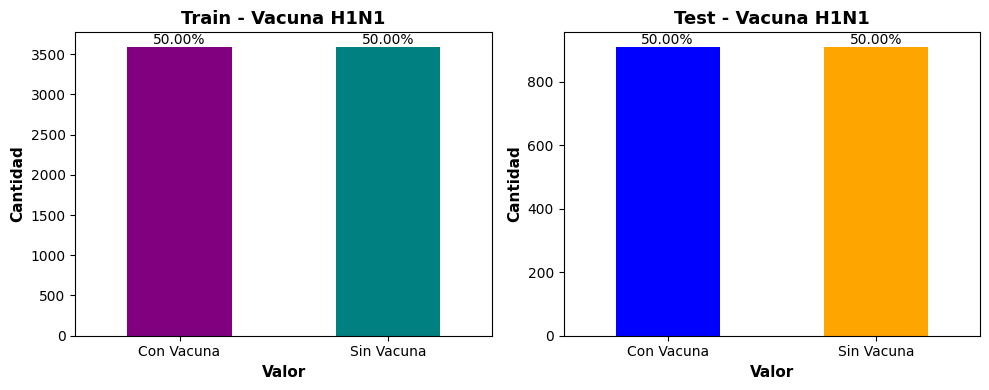

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_title('Train - Vacuna H1N1', fontsize=13, fontweight='bold')
value_train_h1n1 = y_train.value_counts()
y_train.value_counts().plot(kind='bar', ax=axs[0], color = ['purple', 'teal'])
axs[0].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[0].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_h1n1 = ['Con Vacuna', 'Sin Vacuna']
valores_h1n1 = [0, 1]
axs[0].set_xticks(valores_h1n1)
axs[0].set_xticklabels(etiquetas_h1n1, rotation=0)

for i, v in enumerate(value_train_h1n1):
    axs[0].text(i, v, f"{(v / len(y_train) * 100):.2f}%", ha='center', va='bottom')

axs[1].set_title('Test - Vacuna H1N1', fontsize=13, fontweight='bold')
value_test_h1n1 = y_test.value_counts()
y_test.value_counts().plot(kind='bar', ax=axs[1], color = ['blue', 'orange'])
axs[1].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[1].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
axs[1].set_xticks(valores_h1n1)
axs[1].set_xticklabels(etiquetas_h1n1, rotation=0)

for i, v in enumerate(value_test_h1n1):
    axs[1].text(i, v, f"{(v / len(y_test) * 100):.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Red Neuronal

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(data, label_h1n1, test_size=0.2, random_state=42)

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train, y_train = smote.fit_resample(X_tr, y_tr)
X_test, y_test = smote.fit_resample(X_te, y_te)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_h1n1_P = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_h1n1_P.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_h1n1_P.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

loss_11, accuracy_11 = model_h1n1_P.evaluate(X_test, y_test)
print(f'Pérdida: {loss_11:.2f}, Accuracy: {accuracy_11*100:.2f}%')

Epoch 1/15
113/113 [==============================] - 2s 7ms/step - loss: 0.5334 - accuracy: 0.7382 - val_loss: 0.4685 - val_accuracy: 0.7744
Epoch 2/15
113/113 [==============================] - 1s 5ms/step - loss: 0.4761 - accuracy: 0.7654 - val_loss: 0.4545 - val_accuracy: 0.7832
Epoch 3/15
113/113 [==============================] - 1s 5ms/step - loss: 0.4659 - accuracy: 0.7689 - val_loss: 0.4488 - val_accuracy: 0.7849
Epoch 4/15
113/113 [==============================] - 1s 4ms/step - loss: 0.4597 - accuracy: 0.7703 - val_loss: 0.4424 - val_accuracy: 0.7843
Epoch 5/15
113/113 [==============================] - 0s 3ms/step - loss: 0.4549 - accuracy: 0.7721 - val_loss: 0.4382 - val_accuracy: 0.7849
Epoch 6/15
113/113 [==============================] - 0s 3ms/step - loss: 0.4509 - accuracy: 0.7726 - val_loss: 0.4346 - val_accuracy: 0.7843
Epoch 7/15
113/113 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.7730 - val_loss: 0.4304 - val_accuracy: 0.7859
Epoch 

57/57 [==============================] - 0s 1ms/step


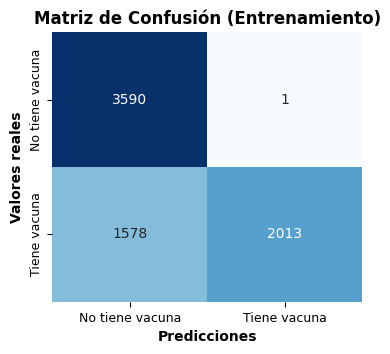

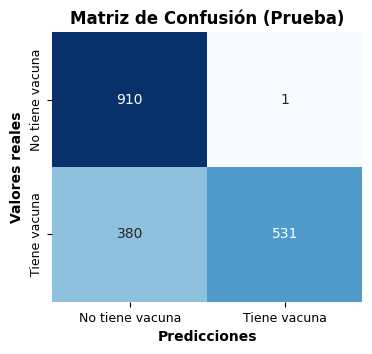

In [ ]:
y_train_pred = model_h1n1_P.predict(X_train)
y_test_pred = model_h1n1_P.predict(X_test)

labels = ['No tiene vacuna', 'Tiene vacuna']

plot_confusion_matrix(y_train, np.round(y_train_pred), labels, title='Matriz de Confusión (Entrenamiento)')

plot_confusion_matrix(y_test, np.round(y_test_pred), labels, title='Matriz de Confusión (Prueba)')

In [ ]:
y_pred = model_h1n1_P.predict(X_test)
classification_report_11 = (classification_report(y_test, np.round(y_pred)))
print(classification_report_11)

57/57 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       911
           1       1.00      0.58      0.74       911

    accuracy                           0.79      1822
   macro avg       0.85      0.79      0.78      1822
weighted avg       0.85      0.79      0.78      1822



### SVM

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(data, label_h1n1, test_size=0.2, random_state=42)

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train, y_train = smote.fit_resample(X_tr, y_tr)
X_test, y_test = smote.fit_resample(X_te, y_te)

In [ ]:
num_folds_values = [4]

In [ ]:
# Preprocesamiento de datos: normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Configurar modelo SVM
model_svm = SVC(kernel='linear', C=10)

# Configurar validación cruzada
kf = KFold(n_splits=num_folds_values[-1], shuffle=True, random_state=42)

# Diccionario para almacenar los resultados
results = {}

# Realizar validación cruzada y almacenar resultados
for num_folds in num_folds_values:
    # Configurar el modelo dentro del bucle
    model_svm = SVC(kernel='linear', C=10)

    # Obtener puntajes de validación cruzada
    acc_scores = cross_val_score(model_svm, X_train_scaled, y_train, cv=num_folds)

    # Calcular el promedio de los puntajes de accuracy
    average_acc = np.mean(acc_scores)
    results[num_folds] = average_acc

    # Imprimir información relevante
    print(f'Accuracy promedio en {num_folds} folds: {average_acc}')

    # Entrenar el modelo con todos los datos de entrenamiento
    model_svm.fit(X_train_scaled, y_train)

    # Hacer predicciones después del entrenamiento
    y_train_pred = model_svm.predict(X_train_scaled)
    y_test_pred = model_svm.predict(X_test)

Accuracy promedio en 4 folds: 0.8479782525078945


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_12 = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {accuracy_12*100:.2f}%')

# Otras métricas
precision_12 = precision_score(y_test, y_test_pred)
recall_12 = recall_score(y_test, y_test_pred)
f1_12 = f1_score(y_test, y_test_pred)

print(f'Precision: {precision_12:.2f}')
print(f'Recall: {recall_12:.2f}')
print(f'F1 Score: {f1_12:.2f}')

Accuracy: 49.84%
Precision: 0.50
Recall: 1.00
F1 Score: 0.67


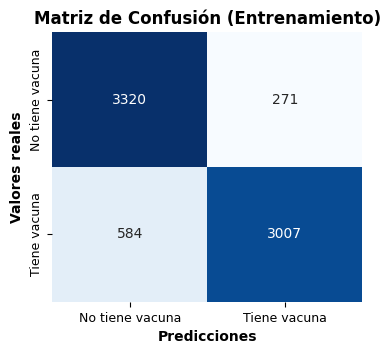

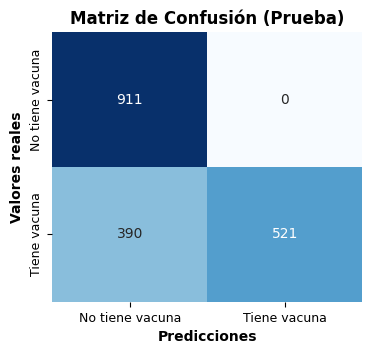

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

y_train_pred = model_svm.predict(X_train_scaled)
y_test_pred = model_svm.predict(X_test_scaled)

labels = ['No tiene vacuna', 'Tiene vacuna']

plot_confusion_matrix(y_train, np.round(y_train_pred), labels, title='Matriz de Confusión (Entrenamiento)')

plot_confusion_matrix(y_test, np.round(y_test_pred), labels, title='Matriz de Confusión (Prueba)')

In [ ]:
classification_report_12 =classification_report(y_test, np.round(y_test_pred))
print(classification_report_12)


              precision    recall  f1-score   support

           0       0.70      1.00      0.82       911
           1       1.00      0.57      0.73       911

    accuracy                           0.79      1822
   macro avg       0.85      0.79      0.78      1822
weighted avg       0.85      0.79      0.78      1822



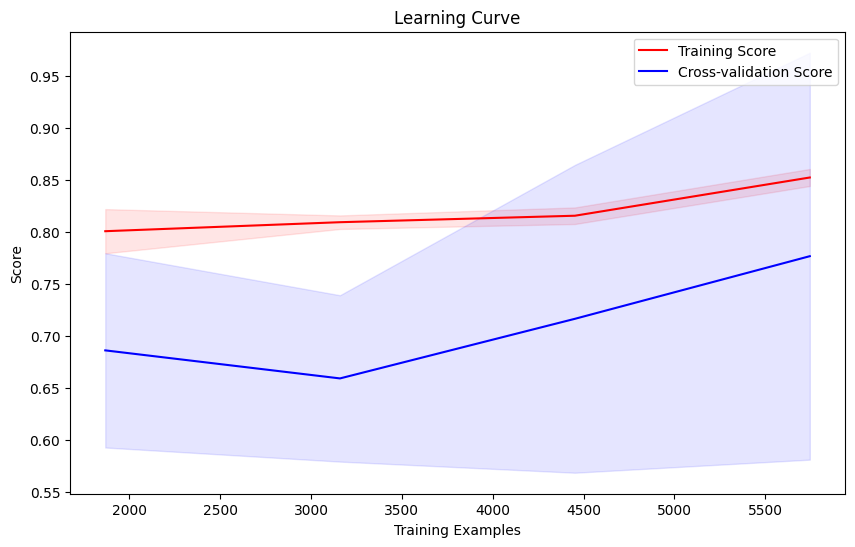

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_svm = SVC(kernel='linear')

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model_svm, X_train_scaled, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='accuracy', n_jobs=-1
)

# Calculate mean and standard deviation for training and test sets
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')

plt.plot(train_sizes, train_scores_mean, label='Training Score', color='r')
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color='r'
)

plt.plot(train_sizes, test_scores_mean, label='Cross-validation Score', color='b')
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color='b'
)

plt.legend(loc='best')
plt.show()



### K-Means

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(data, label_h1n1, test_size=0.2, random_state=42)

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train, y_train = smote.fit_resample(X_tr, y_tr)
X_test, y_test = smote.fit_resample(X_te, y_te)

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=1000, max_iter=100000).fit(X_train)
labels = kmeans.predict(X_train)

clase_a_indice = {clase: [] for clase in set(labels)}

for i, clase in enumerate(labels):
    clase_a_indice[clase].append(i)

y = list(y_train)
clase_a_valores = {clase: [y[i] for i in indices] for clase, indices in clase_a_indice.items()}

frecuencia_por_clase = {}

for clase, valores in clase_a_valores.items():
    total_datos_clase = len(valores)
    frecuencia = {}
    frecuencia_relativa = {}

    for valor in set(valores):
        cantidad = valores.count(valor)
        frecuencia[valor] = cantidad
        frecuencia_relativa[valor] = (cantidad / total_datos_clase) * 100

    frecuencia_por_clase[clase] = (frecuencia, frecuencia_relativa)

print("Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:")
for clase, (frecuencia, frecuencia_relativa) in frecuencia_por_clase.items():
    print(f"Cluster {clase}:")
    for valor, cant in frecuencia.items():
        frec_rel = frecuencia_relativa[valor]
        print(f"{valor}: Cantidad: {cant}, Frecuencia Relativa: {frec_rel:.2f}%")

Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:
Cluster 0:
1: Cantidad: 1252, Frecuencia Relativa: 100.00%
Cluster 1:
0: Cantidad: 3591, Frecuencia Relativa: 60.56%
1: Cantidad: 2339, Frecuencia Relativa: 39.44%


In [ ]:
K = []
fallo = 0
acierto = 0
Num_K = int(input('Cantidad de Clusters correspondientes a H1N1: '))

for i in range(Num_K):
    K.append(int(input('Numero correspondiente al cluster de H1N1: ')))

for i in range(len(labels)):
    if (y[i] == 1) and (labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 0) and not(labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 1) and not(labels[i] in K):
        fallo = fallo+1
    elif (y[i] == 0) and (labels[i] in K):
        fallo = fallo+1
error1 = fallo/len(labels)*100
print(f"El error es: {error1:.2f}%")

Cantidad de Clusters correspondientes a H1N1: 1
Numero correspondiente al cluster de H1N1: 0
El error es: 32.57%


### RESUMEN MODELOS

In [ ]:
import pandas as pd

# Datos de los modelos
data = {
    'Modelo': ['Redes Neuronales', 'SVM', 'K_means'],
    'Accuracy': [accuracy_11, accuracy_12, None],
    'Loss': [loss_11, None, None],
    'Precision': [None, precision_12, None],
    'Recall': [None, recall_12, None],
    'F1-Score': [None, f1_12, None],
    'Error': [None, None, error1],
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar la tabla de comparación
print(df)


             Modelo  Accuracy      Loss  Precision    Recall  F1-Score  \
0  Redes Neuronales  0.790889  0.405341        NaN       NaN       NaN   
1               SVM  0.785950       NaN   0.499175  0.996707  0.665201   
2           K_means       NaN       NaN        NaN       NaN       NaN   

      Error  
0       NaN  
1       NaN  
2  32.56753  


## Distribución de Datos - Seasonal

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(data, label_seasonal, test_size=0.2, random_state=42)

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train, y_train = smote.fit_resample(X_tr, y_tr)
X_test, y_test = smote.fit_resample(X_te, y_te)

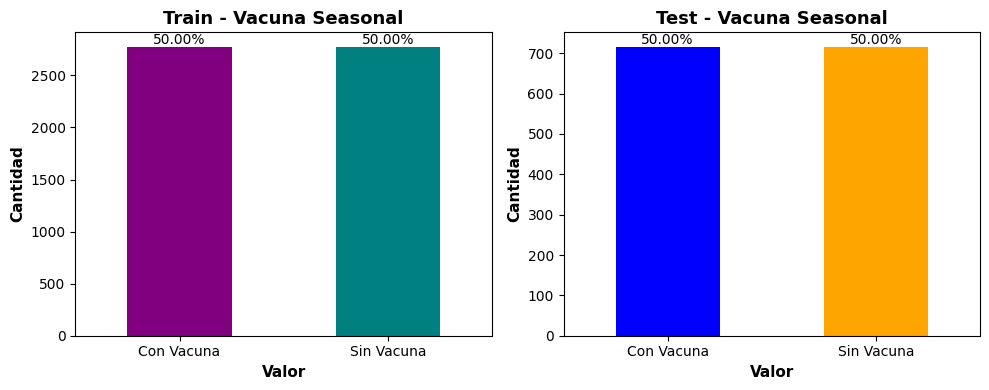

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].set_title('Train - Vacuna Seasonal', fontsize=13, fontweight='bold')
value_train_seasonal = y_train.value_counts()
y_train.value_counts().plot(kind='bar', ax=axs[0], color = ['purple', 'teal'])
axs[0].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[0].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
etiquetas_seasonal = ['Con Vacuna', 'Sin Vacuna']
valores_seasonal = [0, 1]
axs[0].set_xticks(valores_seasonal)
axs[0].set_xticklabels(etiquetas_seasonal, rotation=0)

for i, v in enumerate(value_train_seasonal):
    axs[0].text(i, v, f"{(v / len(y_train) * 100):.2f}%", ha='center', va='bottom')

axs[1].set_title('Test - Vacuna Seasonal', fontsize=13, fontweight='bold')
value_test_seasonal = y_test.value_counts()
y_test.value_counts().plot(kind='bar', ax=axs[1], color = ['blue', 'orange'])
axs[1].set_xlabel('Valor', fontsize=11, fontweight='bold')
axs[1].set_ylabel('Cantidad', fontsize=11, fontweight='bold')
axs[1].set_xticks(valores_seasonal)
axs[1].set_xticklabels(etiquetas_seasonal, rotation=0)

for i, v in enumerate(value_test_seasonal):
    axs[1].text(i, v, f"{(v / len(y_test) * 100):.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Red Neuronal

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_seasonal_P = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])

model_seasonal_P.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_seasonal_P.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))

loss, accuracy = model_h1n1_P.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.2f}, Accuracy: {accuracy*100:.2f}%')

Epoch 1/15
87/87 [==============================] - 1s 5ms/step - loss: 0.6651 - accuracy: 0.5814 - val_loss: 0.6260 - val_accuracy: 0.5992
Epoch 2/15
87/87 [==============================] - 0s 3ms/step - loss: 0.6380 - accuracy: 0.5946 - val_loss: 0.6082 - val_accuracy: 0.6124
Epoch 3/15
87/87 [==============================] - 0s 3ms/step - loss: 0.6238 - accuracy: 0.6495 - val_loss: 0.5938 - val_accuracy: 0.6676
Epoch 4/15
87/87 [==============================] - 0s 3ms/step - loss: 0.6099 - accuracy: 0.6845 - val_loss: 0.5812 - val_accuracy: 0.7703
Epoch 5/15
87/87 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.7305 - val_loss: 0.5660 - val_accuracy: 0.7730
Epoch 6/15
87/87 [==============================] - 0s 3ms/step - loss: 0.5808 - accuracy: 0.7411 - val_loss: 0.5506 - val_accuracy: 0.7675
Epoch 7/15
87/87 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.7530 - val_loss: 0.5379 - val_accuracy: 0.7675
Epoch 8/15
87/87 [==

45/45 [==============================] - 0s 2ms/step


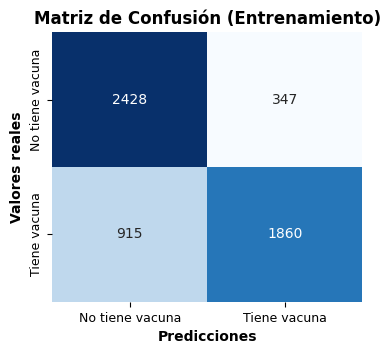

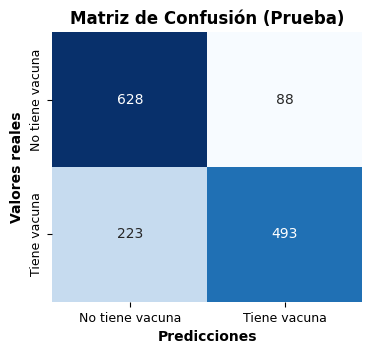

In [ ]:
y_train_pred = model_seasonal_P.predict(X_train)
y_test_pred = model_seasonal_P.predict(X_test)

labels = ['No tiene vacuna', 'Tiene vacuna']

plot_confusion_matrix(y_train, np.round(y_train_pred), labels, title='Matriz de Confusión (Entrenamiento)')

plot_confusion_matrix(y_test, np.round(y_test_pred), labels, title='Matriz de Confusión (Prueba)')

In [ ]:
y_pred = model_seasonal_P.predict(X_test)
print(classification_report(y_test, np.round(y_pred)))

45/45 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.74      0.88      0.80       716
           1       0.85      0.69      0.76       716

    accuracy                           0.78      1432
   macro avg       0.79      0.78      0.78      1432
weighted avg       0.79      0.78      0.78      1432



### SVM

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(data, label_seasonal, test_size=0.2, random_state=42)

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train, y_train = smote.fit_resample(X_tr, y_tr)
X_test, y_test = smote.fit_resample(X_te, y_te)

In [ ]:
# Preprocesamiento de datos: normalización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Configurar modelo SVM
model_svm = SVC(kernel='linear', C=10)

# Configurar validación cruzada
kf = KFold(n_splits=num_folds_values[-1], shuffle=True, random_state=42)

# Diccionario para almacenar los resultados
results = {}

# Realizar validación cruzada y almacenar resultados
for num_folds in num_folds_values:
    # Configurar el modelo dentro del bucle
    model_svm = SVC(kernel='linear', C=0.1)

    # Obtener puntajes de validación cruzada
    acc_scores = cross_val_score(model_svm, X_train_scaled, y_train, cv=num_folds)

    # Calcular el promedio de los puntajes de accuracy
    average_acc = np.mean(acc_scores)
    results[num_folds] = average_acc

    # Imprimir información relevante
    print(f'Accuracy promedio en {num_folds} folds: {average_acc}')

    # Entrenar el modelo con todos los datos de entrenamiento
    model_svm.fit(X_train_scaled, y_train)

    # Hacer predicciones después del entrenamiento
    y_train_pred = model_svm.predict(X_train_scaled)
    y_test_pred = model_svm.predict(X_test)

Accuracy promedio en 4 folds: 0.7425200866838844


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


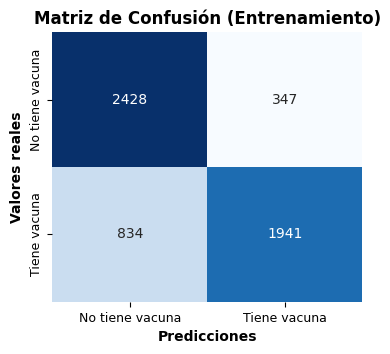

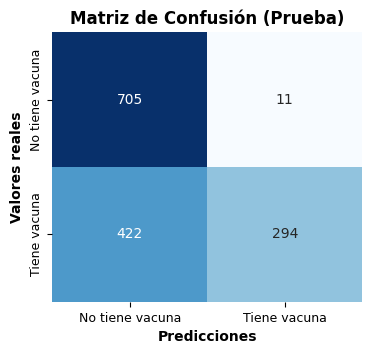

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

y_train_pred = model_svm.predict(X_train_scaled)
y_test_pred = model_svm.predict(X_test_scaled)

labels = ['No tiene vacuna', 'Tiene vacuna']

plot_confusion_matrix(y_train, np.round(y_train_pred), labels, title='Matriz de Confusión (Entrenamiento)')

plot_confusion_matrix(y_test, np.round(y_test_pred), labels, title='Matriz de Confusión (Prueba)')

### K-Means

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(data, label_seasonal, test_size=0.2, random_state=42)

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE al conjunto de entrenamiento
X_train, y_train = smote.fit_resample(X_tr, y_tr)
X_test, y_test = smote.fit_resample(X_te, y_te)

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=1000, max_iter=100000).fit(X_train)
labels = kmeans.predict(X_train)

clase_a_indice = {clase: [] for clase in set(labels)}

for i, clase in enumerate(labels):
    clase_a_indice[clase].append(i)

y = list(y_train)
clase_a_valores = {clase: [y[i] for i in indices] for clase, indices in clase_a_indice.items()}

frecuencia_por_clase = {}

for clase, valores in clase_a_valores.items():
    total_datos_clase = len(valores)
    frecuencia = {}
    frecuencia_relativa = {}

    for valor in set(valores):
        cantidad = valores.count(valor)
        frecuencia[valor] = cantidad
        frecuencia_relativa[valor] = (cantidad / total_datos_clase) * 100

    frecuencia_por_clase[clase] = (frecuencia, frecuencia_relativa)

print("Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:")
for clase, (frecuencia, frecuencia_relativa) in frecuencia_por_clase.items():
    print(f"Cluster {clase}:")
    for valor, cant in frecuencia.items():
        frec_rel = frecuencia_relativa[valor]
        print(f"{valor}: Cantidad: {cant}, Frecuencia Relativa: {frec_rel:.2f}%")

Frecuencia y frecuencia relativa de cada valor por etiqueta de clúster:
Cluster 0:
1: Cantidad: 238, Frecuencia Relativa: 100.00%
Cluster 1:
0: Cantidad: 2775, Frecuencia Relativa: 52.24%
1: Cantidad: 2537, Frecuencia Relativa: 47.76%


In [ ]:
K = []
fallo = 0
acierto = 0
Num_K = int(input('Cantidad de Clusters correspondientes a H1N1: '))

for i in range(Num_K):
    K.append(int(input('Numero correspondiente al cluster de H1N1: ')))

for i in range(len(labels)):
    if (y[i] == 1) and (labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 0) and not(labels[i] in K):
        acierto = acierto+1
    elif (y[i] == 1) and not(labels[i] in K):
        fallo = fallo+1
    elif (y[i] == 0) and (labels[i] in K):
        fallo = fallo+1

print(f"El error es: {fallo/len(labels)*100:.2f}%")

Cantidad de Clusters correspondientes a H1N1: 1
Numero correspondiente al cluster de H1N1: 0
El error es: 45.71%
